# Classifying Hardware Images Using CNN's

There are hundreds of different types of hardware items, and many of them are not commonly known by most people.  In some cases, the task of locating a needed piece of hardware can require consulting with several individuals, multiple trips to stores, and a great deal of wasted time.  This project attempts to show how image classification could be used to address this issue.

## Data
The data comes from processing 5,190 images of hardware items.  I planned on scraping the images from hardware store webpages, but this proved problematic.  For some items, every image was identical.  Others had more than one image, but the number of images was still very limited.  Creating a model where most items had from one to five images just is not practical, so I ended up using my camera to take images of each item.  I tried to capture images from every angle possible and with different backgrounds.  In some images, the item is partially obscured.  I used Python Imaging Library (PIL) to process the images by resizing them to a 28 by 28 pixel square.  I then converted them to arrays.  Two sets of arrays were created: one with a single channel of grayscale values and another with 3 channels (red, green, and blue).

The images all fall into one of five categories, each with approximately 1,000 images.

Hardware Categories:
1. Cam Connectors
2. Anchor Screws
3. Eye Bolt
4. Extruded U-Bolt
5. Jack Nut

Data was divided into three groups:
1. Training set
2. Validation set (used for validation as model is being trained)
3. Test set (only used after model is trained)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K
from sklearn.metrics import confusion_matrix
import time

Using TensorFlow backend.


# Grayscale Data from Processed Images

All images were resized to 28x28.  Here the images have been processed into a single channel, giving a value of 0 to 255 for how dark each pixel is.

In [2]:
# Importing image data saved as numpy arrays
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_val = np.load('X-val.npy')
y_val = np.load('y-val.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

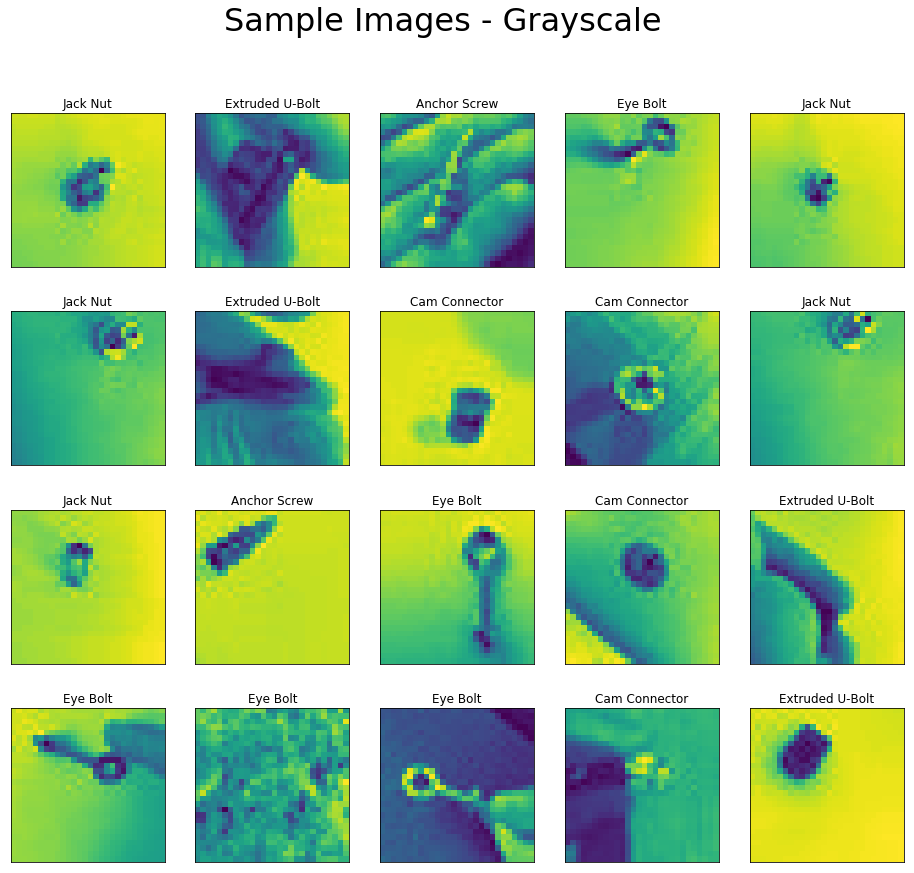

In [3]:
# Plotting first 20 images in training set and labelling each
plt.figure(figsize=(16, 14))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images - Grayscale', fontsize=32)

plt.show()

# Multi-Layer Perceptron

I tried a relatively simple model first, Multi-Layer Perceptron, to see how it would perform.  To do this, I flattened the data into arrays with a length of 784 before training.

In [4]:
# Reshaping to arrays with length 784
X_train = X_train.reshape(3321, 784)
X_val = X_val.reshape(934, 784)
X_test = X_test.reshape(935, 784)

# Converting to float32 for consistency
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Dividing values by 255 to normalize to 1
X_train /= 255
X_val /= 255
X_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [5]:
# Building the model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 54,725
Trainable params: 54,725
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 3321 samples, validate on 934 samples
Epoch 1/50
3321/3321 [==============================] - 2s 466us/step - loss: 1.5677 - acc: 0.3020 - val_loss: 1.3439 - val_acc: 0.4411
Epoch 2/50
3321/3321 [==============================] - 0s 30us/step - loss: 1.3487 - acc: 0.4023 - val_loss: 1.2763 - val_acc: 0.4893
Epoch 3/50
3321/3321 [==============================] - 0s 31us/step - loss: 1.2691 - acc: 0.4333 - val_loss: 1.1786 - val_acc: 0.4882
Epoch 4/50
3321/3321 [==============================] - 0s 31us/step - loss: 1.2614 - acc: 0.4140 - val_loss: 1.2554 - val_acc: 0.4111
Epoch 5/50
3321/3321 [==============================] - 0s 30us/step - loss: 1.2121 - acc: 0.4604 - val_loss: 1.1699 - val_acc: 0.5021
Epoch 6/50
3321/3321 [==============================] - 0s 31us/step - loss: 1.1868 - acc: 0.4598 - val_loss: 1.1555 - val_acc: 0.5418
Epoch 7/50
3321/3321 [==============================] - 0s 30us/step - loss: 1.1849 - acc: 0.4803 - val_loss: 1.3764 - val_acc: 0.4058
Epoch 8

In [7]:
# Validating with Test Set
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', score[1])

Test accuracy: 0.666310160476


Looks like this model isn't terribly accurate.  66.6% is much better than randomly guessing, but two out of three correct is probably not accurate enough to implement in a usable application.  I'll try a CNN model next.

# CNN Using Grayscale Data

Convolutional Neural Networks are one of the more widely used deep learning models.  Unlike the first model, CNN's can handle image data with multiple channels.  However, here I first used the single-channel grayscale data.

In [8]:
# Loading data again
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_val = np.load('X-val.npy')
y_val = np.load('y-val.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

# Converting to float32 for consistency
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Dividing values by 255 to normalize to 1
X_train /= 255
X_val /= 255
X_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [9]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5

# Reshaping
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Building the Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model to put it all together
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 3321 samples, validate on 934 samples
Epoch 1/50
3321/3321 [==============================] - 1s 443us/step - loss: 1.5261 - acc: 0.3144 - val_loss: 1.5037 - val_acc: 0.2334
Epoch 2/50
3321/3321 [==============================] - 0s 67us/step - loss: 1.3126 - acc: 0.4116 - val_loss: 1.2537 - val_acc: 0.4261
Epoch 3/50
3321/3321 [==============================] - 0s 65us/step - loss: 1.1732 - acc: 0.4968 - val_loss: 1.1084 - val_acc: 0.5289
Epoch 4/50
3321/3321 [==============================] - 0s 65us/step - loss: 1.1241 - acc: 0.5218 - val_loss: 1.0302 - val_acc: 0.5600
Epoch 5/50
3321/3321 [==============================] - 0s 66us/step - loss: 1.0484 - acc: 0.5655 - val_loss: 1.0307 - val_acc: 0.5268
Epoch 6/50
3321/3321 [==============================] - 0s 64us/step - loss: 1.0348 - acc: 0.5706 - val_loss: 0.9875 - val_acc: 0.6392
Epoch 7/50
3321/3321 [==============================] - 0s 65us/step - loss: 0.9781 - acc: 0.6067 - val_loss: 0.8955 - val_acc: 0.6531
Epoch 8

In [10]:
# Validating with Test Set
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', score[1])

Test accuracy: 0.941176470716


This model performs much better than the first.  The 94.1% test accuracy means the model has reached the point of usability to create an end product.  I'll see if using the three-channel RGB data can improve the model further.

# RGB Data from Processed Images

Whereas the first two models used only the single grayscale channel, here the images have been processed into three channels, one each for red, green, and blue.

In [11]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

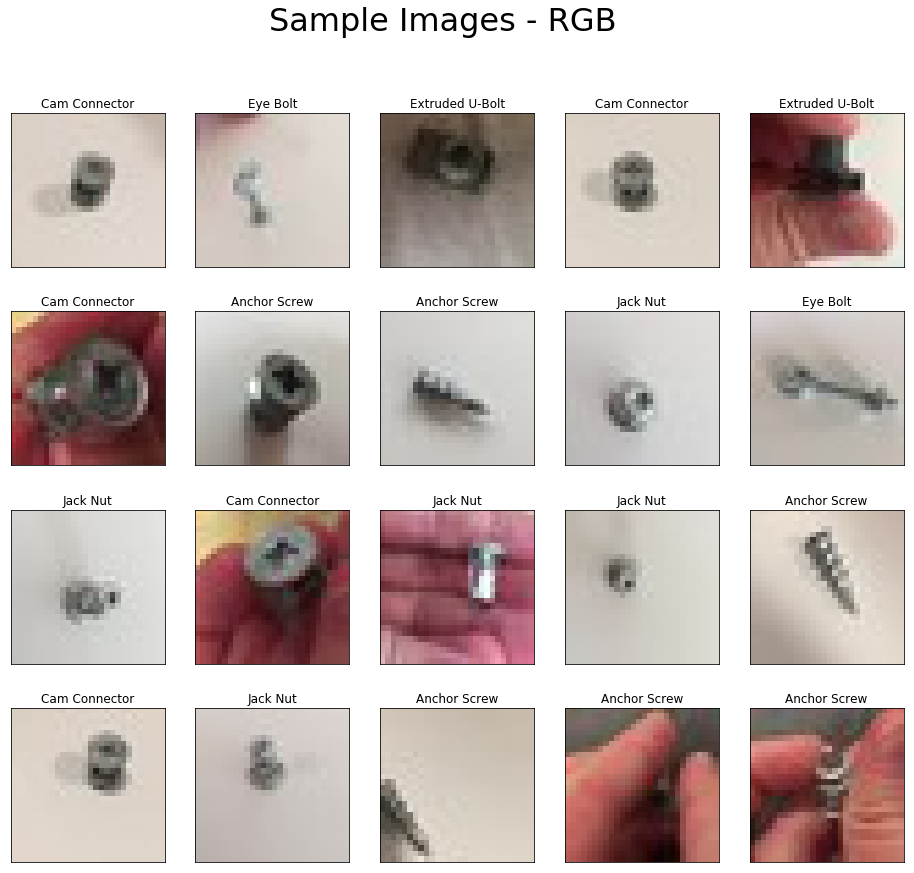

In [12]:
# Displaying images again, this time in color
plt.figure(figsize=(16, 14))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images - RGB', fontsize=32)

plt.show()

# Covolutional Neural Network with RGB Data

As previously stated, CNN's are capable of being trained using arrays with multiple dimensions.  In this case, I am using three channels (red, green, and blue).  As would be expected, the data takes up three times as much disk space, but less of the original data is lost in processing.

In [13]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5

# Reshaping
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

# Converting to float32 for consistency
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Dividing values by 255 to normalize to 1
X_train /= 255
X_val /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Building the Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model to put it all together
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

# Training model
cnn_hist = model.fit(X_train, y_train,
            batch_size=128,
            epochs=70,
            verbose=1,
            validation_data=(X_val, y_val))

X_train shape: (3321, 28, 28, 3)
3321 train samples
935 test samples
Train on 3321 samples, validate on 934 samples
Epoch 1/70
3321/3321 [==============================] - 1s 245us/step - loss: 1.5740 - acc: 0.2909 - val_loss: 1.5915 - val_acc: 0.2645
Epoch 2/70
3321/3321 [==============================] - 0s 75us/step - loss: 1.3616 - acc: 0.4074 - val_loss: 1.1744 - val_acc: 0.5557
Epoch 3/70
3321/3321 [==============================] - 0s 75us/step - loss: 1.1608 - acc: 0.5077 - val_loss: 1.3202 - val_acc: 0.4615
Epoch 4/70
3321/3321 [==============================] - 0s 73us/step - loss: 1.1204 - acc: 0.5260 - val_loss: 0.9743 - val_acc: 0.6360
Epoch 5/70
3321/3321 [==============================] - 0s 71us/step - loss: 1.0579 - acc: 0.5787 - val_loss: 0.9007 - val_acc: 0.6777
Epoch 6/70
3321/3321 [==============================] - 0s 72us/step - loss: 0.9475 - acc: 0.6350 - val_loss: 0.8470 - val_acc: 0.6713
Epoch 7/70
3321/3321 [==============================] - 0s 71us/step - lo

3321/3321 [==============================] - 0s 72us/step - loss: 0.0385 - acc: 0.9889 - val_loss: 0.1063 - val_acc: 0.9679
Epoch 61/70
3321/3321 [==============================] - 0s 71us/step - loss: 0.0403 - acc: 0.9883 - val_loss: 0.0880 - val_acc: 0.9690
Epoch 62/70
3321/3321 [==============================] - 0s 71us/step - loss: 0.0275 - acc: 0.9916 - val_loss: 0.0945 - val_acc: 0.9700
Epoch 63/70
3321/3321 [==============================] - 0s 71us/step - loss: 0.0320 - acc: 0.9910 - val_loss: 0.0775 - val_acc: 0.9764
Epoch 64/70
3321/3321 [==============================] - 0s 70us/step - loss: 0.0248 - acc: 0.9931 - val_loss: 0.1055 - val_acc: 0.9679
Epoch 65/70
3321/3321 [==============================] - 0s 69us/step - loss: 0.0473 - acc: 0.9855 - val_loss: 0.0975 - val_acc: 0.9700
Epoch 66/70
3321/3321 [==============================] - 0s 68us/step - loss: 0.0196 - acc: 0.9964 - val_loss: 0.0846 - val_acc: 0.9754
Epoch 67/70
3321/3321 [==============================] - 0s 

In [14]:
# Validating with Test Set
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', score[1])

Test accuracy: 0.975401069519


## CNN with RGB Data Performance

This model does show a significant improvement in performance.  We see an improvement in accuracy in the test set from 94.1% to 97.5%.  Furthermore, the training time was not significantly affected by the larger data set from the RGB data.  Each step took about 72 microseconds in comparison to 65 microseconds in the previous model.

Below, the performance is displayed by number of Epochs run.  We see a significant gain in accuracy over the first 20 or so Epochs and lesser gains after that.  The overall trend is a gain in accuracy after each step, but some steps show a decrease in accuracy.

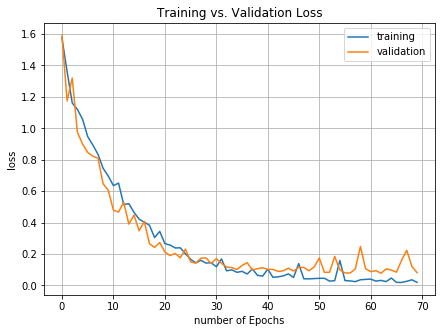

In [15]:
# Setting up to compare loss
train_loss = cnn_hist.history['loss']
val_loss = cnn_hist.history['val_loss']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title('Training vs. Validation Loss')
plt.grid(True)
plt.legend(['training','validation'])
plt.show()

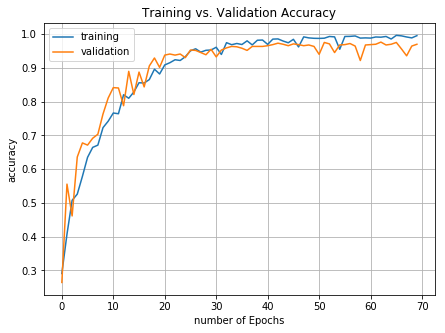

In [16]:
# Setting up to compare accuracy
train_acc=cnn_hist.history['acc']
val_acc=cnn_hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('number of Epochs')
plt.ylabel('accuracy')
plt.title('Training vs. Validation Accuracy')
plt.grid(True)
plt.legend(['training','validation'])
plt.show()

# Confusion Matrix - Training Data

Overall, most items are classified correctly.  We see that the most common misclassification is images of cam connectors classified as anchor screws.  From looking at items, it is easy to see why this occurs.  The flat faces from the two items look similar.

In [17]:
# Creating and labeling confusion matrix
y_pred = model.predict_classes(X_test)
y_test = np.load('y-test-rgb.npy')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm.columns = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm.index = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm = cm.rename_axis('actual').rename_axis('predicted', axis=1)
display(cm)

predicted,cam_connector,anchor_screw,extruded_u_bolt,eye_bolt,jack_nut
actual,,,,,
cam_connector,173,9,3,0,0
anchor_screw,1,187,1,0,1
extruded_u_bolt,0,3,188,0,2
eye_bolt,1,1,1,169,0
jack_nut,0,0,0,0,195


# Refined CNN Model Using RGB Data

I attempted to improve on the third model by adjusting the different hyperparameters found in the model.  I tried different layer sizes, activation funtions, kernel sizes, losses, optimizer functions, batch sizes, learning rates, and dropout rates.  Some changes seemed to make little difference while others resulted in significant performance drops.  A few changes did result in very small gains in performance, and I have implemented those changes in the model below.

In [18]:
# Importing data again
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

In [19]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5

# Reshaping
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

# Converting to float32 for consistency
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Dividing values by 255 to normalize to 1
X_train /= 255
X_val /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Create array to store performance metrics
param_perf = []

# Tuning hyperparameters
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(1, 1),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.cosine_proximity,
                optimizer=keras.optimizers.Adamax(),
                metrics=['accuracy'])

cnn_hist = model.fit(X_train, y_train,
            batch_size=64,
            epochs=100,
            verbose=1,
            validation_data=(X_val, y_val))

Train on 3321 samples, validate on 934 samples
Epoch 1/100
3321/3321 [==============================] - 1s 356us/step - loss: -0.5428 - acc: 0.4360 - val_loss: -0.6449 - val_acc: 0.5921
Epoch 2/100
3321/3321 [==============================] - 0s 117us/step - loss: -0.6586 - acc: 0.5905 - val_loss: -0.6919 - val_acc: 0.6456
Epoch 3/100
3321/3321 [==============================] - 0s 116us/step - loss: -0.7218 - acc: 0.6772 - val_loss: -0.7581 - val_acc: 0.7216
Epoch 4/100
3321/3321 [==============================] - 0s 112us/step - loss: -0.7573 - acc: 0.7218 - val_loss: -0.7976 - val_acc: 0.7730
Epoch 5/100
3321/3321 [==============================] - 0s 115us/step - loss: -0.8001 - acc: 0.7784 - val_loss: -0.8253 - val_acc: 0.8308
Epoch 6/100
3321/3321 [==============================] - 0s 114us/step - loss: -0.8204 - acc: 0.8034 - val_loss: -0.8255 - val_acc: 0.8191
Epoch 7/100
3321/3321 [==============================] - 0s 116us/step - loss: -0.8488 - acc: 0.8374 - val_loss: -0.874

3321/3321 [==============================] - 0s 117us/step - loss: -0.9928 - acc: 0.9937 - val_loss: -0.9843 - val_acc: 0.9829
Epoch 60/100
3321/3321 [==============================] - 0s 116us/step - loss: -0.9933 - acc: 0.9943 - val_loss: -0.9849 - val_acc: 0.9829
Epoch 61/100
3321/3321 [==============================] - 0s 119us/step - loss: -0.9918 - acc: 0.9919 - val_loss: -0.9807 - val_acc: 0.9786
Epoch 62/100
3321/3321 [==============================] - 0s 118us/step - loss: -0.9920 - acc: 0.9943 - val_loss: -0.9830 - val_acc: 0.9786
Epoch 63/100
3321/3321 [==============================] - 0s 120us/step - loss: -0.9903 - acc: 0.9904 - val_loss: -0.9819 - val_acc: 0.9818
Epoch 64/100
3321/3321 [==============================] - 0s 120us/step - loss: -0.9905 - acc: 0.9916 - val_loss: -0.9794 - val_acc: 0.9786
Epoch 65/100
3321/3321 [==============================] - 0s 118us/step - loss: -0.9923 - acc: 0.9937 - val_loss: -0.9834 - val_acc: 0.9818
Epoch 66/100
3321/3321 [=========

In [20]:
# Validating with Test Set
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', score[1])

Test accuracy: 0.980748663102


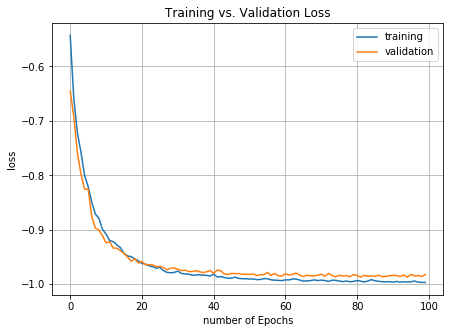

In [21]:
# Setting up to compare loss
train_loss = cnn_hist.history['loss']
val_loss = cnn_hist.history['val_loss']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title('Training vs. Validation Loss')
plt.grid(True)
plt.legend(['training','validation'])
plt.show()

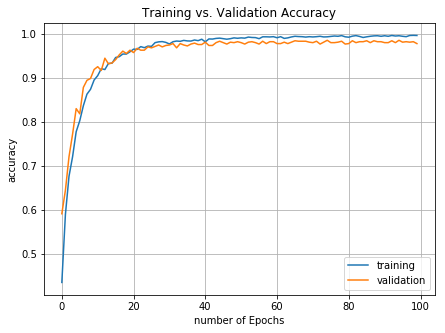

In [22]:
# Setting up to compare accuracy
train_acc=cnn_hist.history['acc']
val_acc=cnn_hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('number of Epochs')
plt.ylabel('accuracy')
plt.title('Training vs. Validation Accuracy')
plt.grid(True)
plt.legend(['training','validation'])
plt.show()

In [23]:
# Creating and labeling confusion matrix
y_pred = model.predict_classes(X_test)
y_test = np.load('y-test-rgb.npy')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm.columns = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm.index = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm = cm.rename_axis('actual').rename_axis('predicted', axis=1)
display(cm)

predicted,cam_connector,anchor_screw,extruded_u_bolt,eye_bolt,jack_nut
actual,,,,,
cam_connector,179,5,1,0,0
anchor_screw,1,187,1,0,1
extruded_u_bolt,1,4,187,0,1
eye_bolt,2,0,0,170,0
jack_nut,0,1,0,0,194


# Refined Model Performance

Thge refined model resulted in improved accuracy on the test set from 97.5% to 98.1%.  This model did take somewhat longer to train.  Each Epoch took about 114 microseconds, while the previous model took about 72 per step.  This is still fairly fast, but may not be worth it with a much larger data set.

# Testing in the Wild

Let's see how the model performs on images taken by someone else.  These images were taken by someone else and them processed in the same way as the other images.

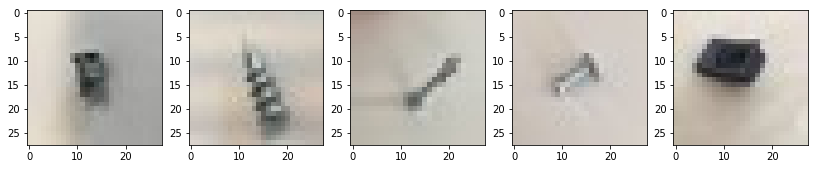

In [24]:
# Importing data saved as numpy arrays
test_images = np.load('misc-array.npy')
test_labels = np.load('misc-labels.npy')

plt.figure(figsize=(14,4))
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i])
plt.show()

In [25]:
# Modifying data in order predict class for each
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 3)
test_images = test_images.astype('float32')
test_images /= 255
test_pred = model.predict_classes(test_images)

In [26]:
# Creating and labeling confusion matrix
cm2 = confusion_matrix(test_labels, test_pred)
cm2 = pd.DataFrame(cm2)
cm2.columns = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm2.index = ['cam_connector', 'anchor_screw', 'extruded_u_bolt', 'eye_bolt', 'jack_nut']
cm2 = cm2.rename_axis('actual').rename_axis('predicted', axis=1)
display(cm2)

predicted,cam_connector,anchor_screw,extruded_u_bolt,eye_bolt,jack_nut
actual,,,,,
cam_connector,0,1,0,0,0
anchor_screw,0,1,0,0,0
extruded_u_bolt,0,0,1,0,0
eye_bolt,0,0,0,1,0
jack_nut,0,0,0,0,1


## In the Wild Performance

4 out of the 5 images were classified correctly.  Perhaps a model with more training data could improve this performance.

# Full Scale Model

A full scale model would obviously require some changes in implementation.  Apache Spark now has an integrated image pipeline that could be used to read, clean, and process images to feed into a model using the spark.ml.image.imageSchema structure.  Then the TensorFlowOnSpark library could be used to train the model using the large amount of data on the servers in the same way the above models were trained using the smaller data set.

A phone app could be created for customer use to help them find the hardware items they are looking for.  The app would have customers take a photo (or perhaps multiple photos from different angles or even a short video) of the item and upload images to the server, where they would be processed and fed into the trained model to find the predicted match.  Then customers would be directed to the website where they would be able to find that item for purchase.

Significantly more data would be required to create a fully functional model.  Perhaps the most practical way to accomplish this is have multiple videos taken of each item from every angle and take the frames from the video.  Technology also exists to construct intermediate photos from existing ones.  Data augmentation could be useful as well.  After initial training of the model, further training could occur by prompting users to answering whether or not they were directed to the correct item and adding customers' correctly classified images to the model.

# Other Possible Steps

There are some other possible changes that could be investigated.  Higher resolution images might result in a better model (though this would increase the resources needed).  Other ways of processing color channels also exist.  Finally, cropping images to the edges of the item in the image might further improve model performance.